# Correlation Analysis

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

# Load Data
- 키, 몸무게 데이터

In [3]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/PII.csv'

DF = pd.read_csv(url)

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Name       17 non-null     object 
 1   Gender     17 non-null     object 
 2   Age        17 non-null     int64  
 3   Grade      17 non-null     int64  
 4   Picture    17 non-null     object 
 5   BloodType  17 non-null     object 
 6   Height     17 non-null     float64
 7   Weight     17 non-null     float64
dtypes: float64(2), int64(2), object(4)
memory usage: 1.2+ KB


In [4]:
DF.head()

,Name,Gender,Age,Grade,Picture,BloodType,Height,Weight
0,송태섭,남자,21,3,무,B,179.1,63.9
1,최유정,여자,23,1,유,A,177.1,54.9
2,이한나,여자,20,1,무,A,167.9,50.2
3,김소혜,여자,23,3,무,O,176.1,53.5
4,서태웅,남자,24,4,무,B,176.1,79.8


## 1. Covariance

### 1) 공분산

In [8]:
np.cov(DF.Height, DF.Weight)[0][1]

# 수치에 따라 공분산에 차이가 있을 수 있으므로, 상관계수를 구해줌

63.83036764705884

### 2) Pearson 상관계수
- 공분산을 두 변수의 표준편차의 곱으로 나눈 값

In [9]:
np.cov(DF.Height, DF.Weight)[0][1] / \
((np.std(DF.Height, ddof = 1) * (np.std(DF.Weight, ddof = 1))))

0.6848075756314844

## 2. scipy

### 1) Karl Pearson 상관계수
- 우리가 쓰는 대부분의 상관계수는 pearson 상관계수이다
- 기본적으로 등간척도/비율척도 변수에만 적용 가능

In [19]:
stats.pearsonr(DF.Height, DF.Weight)

# 두번째 값은 p-value

(0.6848075756314843, 0.002421009549216189)

### 2) Spearman 상관계수
- 서열척도 변수가 포함되어도 적용 가능
- 반드시 연속형이 아니어도 된다
- 등간척도/비율척도 두 변수 간의 관계가 비선형적일 때 적용

In [21]:
stats.spearmanr(DF.Height, DF.Weight)[0]

0.6507060771796446

### 3) kandall tau
- spearman 상관계수와 같은 경우 적용 가능
- 표본이 작을 때 spearman 상관계수보다 신뢰할 수 있음

In [13]:
stats.kendalltau(DF.Height, DF.Weight)[0]

0.5278846884821402

## 3. pandas

### 1) Pearson 상관계수
- method('pearson' , 'spearman' , 'kendall')

In [14]:
DF.corr(method = 'pearson')

,Age,Grade,Height,Weight
Age,1.000000,0.495118,0.349681,0.452384
Grade,0.495118,1.000000,0.312777,0.574785
Height,0.349681,0.312777,1.000000,0.684808
Weight,0.452384,0.574785,0.684808,1.000000


In [22]:
DF.corr(method = 'spearman')

,Age,Grade,Height,Weight
Age,1.000000,0.469285,0.303355,0.442665
Grade,0.469285,1.000000,0.303913,0.575186
Height,0.303355,0.303913,1.000000,0.650706
Weight,0.442665,0.575186,0.650706,1.000000


In [23]:
DF.corr(method = 'kendall')

,Age,Grade,Height,Weight
Age,1.000000,0.414786,0.221565,0.337703
Grade,0.414786,1.000000,0.232970,0.442621
Height,0.221565,0.232970,1.000000,0.527885
Weight,0.337703,0.442621,0.527885,1.000000


### 2) Heat Map

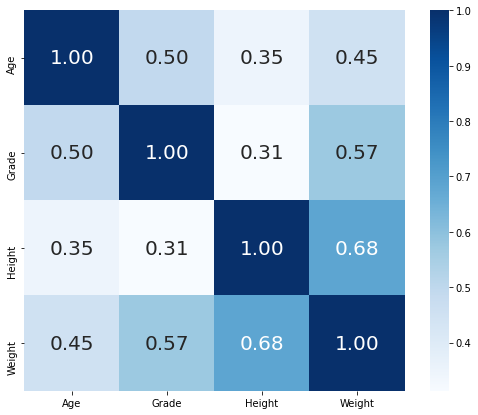

In [16]:
plt.figure(figsize = (9, 7))
sns.heatmap(DF.corr(),
            cbar = True,
            annot = True,
            annot_kws = {'size' : 20} ,
            fmt = '.2f' ,
            square = True ,
            cmap = 'Blues')

plt.show()

## 4. numpy

### 1) Pearson 게수

In [17]:
np.corrcoef(DF.Height, DF.Weight)[0][1]

0.6848075756314843

## 5. Visualization

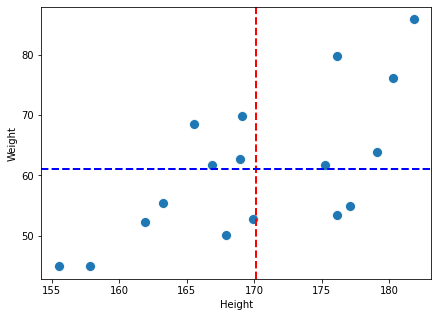

In [18]:
plt.figure(figsize = (7, 5))
sns.scatterplot(x = DF.Height,
                y = DF.Weight,
                s = 100)

plt.axvline(DF.Height.mean(),
            color = 'r' ,
            linestyle = 'dashed' ,
            linewidth = 2)

plt.axhline(DF.Weight.mean(),
            color = 'b' ,
            linestyle = 'dashed' ,
            linewidth = 2)

plt.show()


# 빨간선: 키의 평균
# 파란선: 몸무게의 평균

# 공분산: 같은 방향으로 변화하면 + 가 되고, 다른 방향으로 변화하면 - 값이 됨
# 원래 있던 x값 - x평균, 면적이 계산됨
# 1사분면, 3사분면은 모두 플러스 값이 나오게 되지만,
# 2사분면, 4사분면은 마이너스 값이 나오게 됨
# 점들의 면적을 모두 구해 더하는 개념

# 단위가 다르므로 표준편차의 곱으로 나눠서 정규화를 시켜준 것